In [5]:
import sys  
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import matplotlib_inline
import matplotlib as mpl

sys.path.insert(0, '../../')
from statlearn.classification import LDA, QDA
from statlearn.visualise import get_boundaries

%matplotlib inline
%load_ext autoreload
%autoreload 2
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
rcParams = {
    'font.family' : 'Latin Modern Math',
    'font.size': 12,
    'axes.linewidth' : 1.5,
    'mathtext.fontset' : 'stix'
}
mpl.rcParams.update(rcParams)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear Discriminant Analysis

## LDA - equal covariances

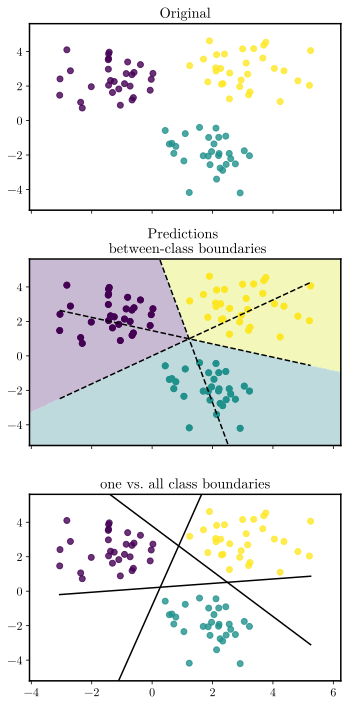

In [6]:
# simulate the data
Sigma = np.eye(2)
N = 30
x1 = mvn.rvs(np.array([-1, 2]), Sigma, N)
x2 = mvn.rvs(np.array([2, -2]), Sigma, N)
x3 = mvn.rvs(np.array([3, 3]), Sigma, N)
X = np.concatenate([x1, x2, x3])
y = np.concatenate([
    np.repeat(0, len(x1)),
    np.repeat(1, len(x2)),
    np.repeat(2, len(x3))
])

# fit the model
lda = LDA()
y_pred = lda.fit_transform(X, y)

# get decision boundaries
a01, b01 = lda.get_boundary('one-to-one', 0, 1)
a12, b12 = lda.get_boundary('one-to-one', 1, 2)
a02, b02 = lda.get_boundary('one-to-one', 0, 2)

a00, b00 = lda.get_boundary('one-vs-all', 0, equal_prob=True)
a11, b11 = lda.get_boundary('one-vs-all', 1, equal_prob=True)
a22, b22 = lda.get_boundary('one-vs-all', 2, equal_prob=True)

x_axs = np.linspace(X[:, 0].min(), X[:, 0].max())

xlim = (X[:, 0].min() - 1, X[:, 0].max() + 1)
ylim = (X[:, 1].min() - 1, X[:, 1].max() + 1)
xx, yy, Z = get_boundaries(lda, xlim, ylim, 200)

# plot the results
fig, ax = plt.subplots(3, 1, figsize = (5, 10), sharex=True, sharey=True)
## plot original
ax[0].set_title("Original")
ax[0].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
## plot between-class boundaries and predcitions
ax[1].set_title("Predictions \n between-class boundaries")
ax[1].scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.8)
ax[1].plot(x_axs, [a01 * x + b01 for x in x_axs], color='black', linestyle='--')
ax[1].plot(x_axs, [a12 * x + b12 for x in x_axs], color='black', linestyle='--')
ax[1].plot(x_axs, [a02 * x + b02 for x in x_axs], color='black', linestyle='--')
ax[1].contourf(xx, yy, Z, alpha=0.3)
ax[1].scatter(X[:, 0], X[:, 1], c=y_pred)
# plot one vs. all class boundaries
ax[2].set_title("one vs. all class boundaries")
ax[2].scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.8)
ax[2].plot(x_axs, [a00 * x + b00 for x in x_axs], color='black')
ax[2].plot(x_axs, [a11 * x + b11 for x in x_axs], color='black')
ax[2].plot(x_axs, [a22 * x + b22 for x in x_axs], color='black')

ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)
fig.tight_layout()
plt.show()

## QDA - different covariances

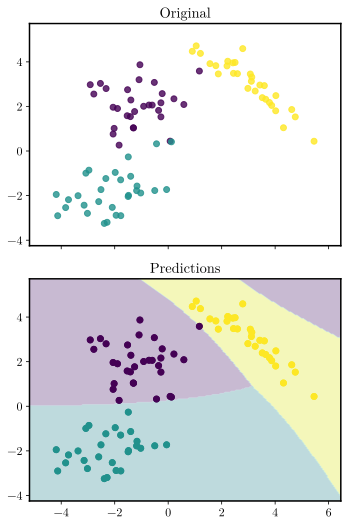

In [7]:
# simulate the tdata
N = 30
x1 = mvn.rvs(np.array([-1, 2]), np.array([[1, 0], [0, 1]]), N)
x2 = mvn.rvs(np.array([-2, -2]), np.array([[1, 0.6], [0.6, 1]]), N)
x3 = mvn.rvs(np.array([3, 3]), np.array([[1, -0.9], [-0.9, 1]]), N)
X = np.concatenate([x1, x2, x3])
y = np.concatenate([
    np.repeat(0, len(x1)),
    np.repeat(1, len(x2)),
    np.repeat(2, len(x3))
])

# fit the model
qda = QDA()
y_pred = qda.fit_transform(X, y)

# plot the results
fig, ax = plt.subplots(2, 1, figsize = (5, 7.5), sharex=True, sharey=True)
## plot original data
ax[0].set_title("Original")
ax[0].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
## plot predictions and the boundaries
ax[1].set_title("Predictions")
ax[1].scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.8)
xlim = (X[:, 0].min() - 1, X[:, 0].max() + 1)
ylim = (X[:, 1].min() - 1, X[:, 1].max() + 1)
xx, yy, Z = get_boundaries(qda, xlim, ylim, 200)
ax[1].contourf(xx, yy, Z, alpha=0.3)
ax[1].scatter(X[:, 0], X[:, 1], c=y_pred)

ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)
fig.tight_layout()
plt.show()

## Compare QDA and LDA with quadratic terms

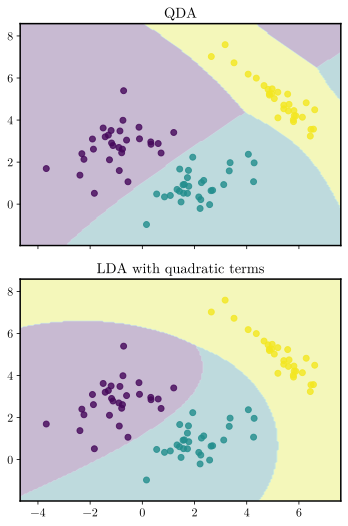

In [8]:
# simulate the data
N = 30
x1 = mvn.rvs(np.array([-1, 3]), np.array([[1, 0], [0, 1]]), N)
x2 = mvn.rvs(np.array([2, 1]), np.array([[1, 0.6], [0.6, 1]]), N)
x3 = mvn.rvs(np.array([5, 5]), np.array([[1, -0.9], [-0.9, 1]]), N)
X = np.concatenate([x1, x2, x3])
y = np.concatenate([
    np.repeat(0, len(x1)),
    np.repeat(1, len(x2)),
    np.repeat(2, len(x3))
])
X2 = np.column_stack([X, X**2])

# fit both models
qda = QDA()
qda_y_pred = qda.fit_transform(X, y)
lda = LDA()
lda_y_pred = lda.fit_transform(X2, y)

# plot the results
fig, ax = plt.subplots(2, 1, figsize = (5, 7.5), sharex=True, sharey=True)
xlim = (X[:, 0].min() - 1, X[:, 0].max() + 1)
ylim = (X[:, 1].min() - 1, X[:, 1].max() + 1)
## plot the QDA predictions
ax[0].set_title("QDA")
ax[0].scatter(X[:, 0], X[:, 1], c=qda_y_pred, alpha=0.8)
xx, yy, Z = get_boundaries(qda, xlim, ylim, 200)
ax[0].contourf(xx, yy, Z, alpha=0.3)
## plot the LDA predictions
ax[1].set_title("LDA with quadratic terms")
ax[1].scatter(X[:, 0], X[:, 1], c=lda_y_pred, alpha=0.8)
Z = lda.predict(np.column_stack([
    xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2
]))
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, alpha=0.3)

ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)
fig.tight_layout()
plt.show()